# **Project Name**    - Netflix Movies And TV Shows Clustering.


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Md Ismail Quraishi

# **Project Summary -**

This is an Unsupervised Machine learning project in this project I will have to build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_4_netflix_clustering

# **Problem Statement**


**My Task is to make a Model that can cluster similar type of content together.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset - drive mount and loading dataset
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Unsupervised ML/NetflixMoviesAndTVShowsClustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(path)

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Tail of the dataset
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
netflix_df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
netflix_df[netflix_df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count - Function for calculating null values
def nullCalculator(df):
  ''' Takes dataset and returns a dataset which shows null value counts and percentage. '''
  df_null = df.isna().sum().reset_index()
  df_null['null_%'] = round((df.isna().sum()/len(df))*100,2).reset_index()[0]
  df_null.rename(columns={'index':'variables',0:'null'},inplace=True)
  return df_null

# Show null values
nullCalculator(netflix_df)

variables  null  null_%
0        show_id     0    0.00
1           type     0    0.00
2          title     0    0.00
3       director  2389   30.68
4           cast   718    9.22
5        country   507    6.51
6     date_added    10    0.13
7   release_year     0    0.00
8         rating     7    0.09
9       duration     0    0.00
10     listed_in     0    0.00
11   description     0    0.00

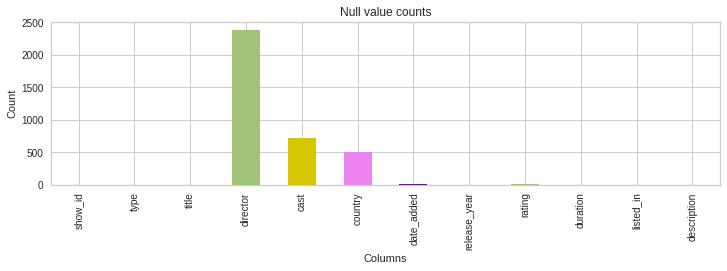

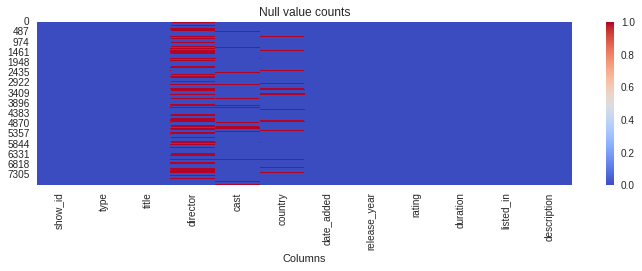

In [10]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (12,3)
netflix_df.isna().sum().plot.bar(color=['violet','indigo','b','g','y'])
plt.title('Null value counts')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()
print('')
# Heatmap
sns.heatmap(netflix_df.isna(),cmap='coolwarm')
plt.title('Null value counts')
plt.xlabel('Columns')
plt.show()

### What did you know about your dataset?

The dataset has 7787 rows and 12 columns where the column director has 2389, cast has 718, country has 507, date_added has 10 and rating has 7 null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
netflix_df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

The dataset has total 7787 rows and 12 columns:
1. Show_id : show ID
2. type : Type of the show like movie or TV show
3. title : Title of the show
4. director : Director of the show
5. cast : Actors and actress of the show
6. country : Country of the origin of the show
7. date_added : Date when the show added to netflix
8. release_year : Release year
9. rating : rating
10. duration : duration of the show
11. listed_in : Listed in
12. description : Description of the show

### Check Unique Values for each variable.

In [13]:
# Check Unique Value counts for each variable.
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [14]:
# Unique values for each variable
for col in netflix_df.columns:
  print('Unique values for ',col,'are \n',netflix_df[col].unique(),'\n')

Unique values for  show_id are 
 ['s1' 's2' 's3' ... 's7785' 's7786' 's7787'] 

Unique values for  type are 
 ['TV Show' 'Movie'] 

Unique values for  title are 
 ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"] 

Unique values for  director are 
 [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn'] 

Unique values for  cast are 
 ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo'] 

Unique v

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
      ''' init method '''
      try:
          self.df = df.copy()
          self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
          self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
          self.cast_ = self.get_cast_or_listed_in('cast')
          self.genres_ = self.get_cast_or_listed_in('listed_in')
          self.directors_ = self.getTopValues('director')
          self.countries_ = self.getTopValues('country')
          self.release_years_ = self.getTopValues('release_year')
          self.ratings_ = self.getTopValues('rating')
          self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))
            
      except:
          print('Invalid input!')
    # Function to get dataset
    def get_df(self):
      ''' Function returns dataframe '''
      return self.df
    # Function to get movies dataset
    def getMovies(self):
      ''' Function returns returns dataframe which contains data of movies '''
      return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
      ''' Function returns dataframe which contains data of tv shows '''
      return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
      ''' Function returns top values for the given column '''
      try:
          return self.df[col].value_counts().sort_values(ascending=False)
      except:
          return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      ''' Function for setting duration values '''
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]
    
    # Function to set duration unit
    def set_duration_unit(self,duration):
      ''' function for setting duration unit. '''
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'
    
    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):   
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
          # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)        
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)
    
    
    # Function for converting duration_value into int type
    def convertInt(self,col):
      ''' Function to convert other type into integer '''
      return int(col)
    
    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
      ''' Function which returns Shows per month '''
      df = pd.DataFrame()
      if typ == 'tv':
          df = self.getTvShows()
      elif typ == 'movie':
          df = self.getMovies()
      else:
          df = self.df.copy()
      df = df[df['date_added'].isna() == False]
      df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
      monthly_shows = df['added_month'].value_counts()
      return monthly_shows

    # Get Text Length
    def getTextLength(self,text):
      return len(text)
    # Get Dataframe with length column
    def getDfWithLength(self,col):
      df = self.df.copy()
      df['text_length'] = df[col].apply(self.getTextLength)
      return df
    
# Initializing the object
netflixWrangling = NetflixWrangling(netflix_df)

In [16]:
# Printing the shapes for each type of shows
print('Data for Movies has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for TV shows has shape :',netflixWrangling.getTvShows().shape)
print('')

Data for Movies has shape : (5377, 14)

Data for TV shows has shape : (2410, 14)



In [17]:
# Total length for each type of durations
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

duration_unit
min       533979
season      4280
Name: duration_value, dtype: int64

In [18]:
# Total number of Shows for each month
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

Total number of Shows for each month


December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: added_month, dtype: int64

In [19]:
# Total number of Movies for each month
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

Total number of Movies for each month


January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: added_month, dtype: int64

In [20]:
# Total number of TV Shows for each month
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

Total number of TV Shows for each month


December     279
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     144
Name: added_month, dtype: int64

In [21]:
# Assigning top 10 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

Top 5 actors with highest number of shows :


Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Takahiro Sakurai    29
dtype: int64

In [22]:
# Top 5 directors with highest number of shows
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

Top 5 directors with highest number of shows :


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

In [23]:
# Top 5 countries with highest number of shows
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

Top 5 countries with highest number of shows :


United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

In [24]:
# Top 5 years with highest number of shows released
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

Top 5 years with highest number of shows released:


2018    1121
2017    1012
2019     996
2016     882
2020     868
Name: release_year, dtype: int64

In [25]:
# Top ratings with highest number of shows
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

Top ratings with highest number of shows :


TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [26]:
# Top 5 Genres with highest number of Movies/TV Shows
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

Top 5 Genres with highest number of Movies/TV Shows


International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

In [27]:
# Top 10 directors with highest length of descriptions
print('Top 10 Directors with highest length of descriptions')
netflixWrangling.getDfWithLength('description').groupby('director')['text_length'].mean().sort_values(ascending=False).reset_index().head(10)

Top 10 Directors with highest length of descriptions


director  text_length
0        Chia Tang        246.0
1    Gene Quintano        244.0
2       Chris Koch        243.0
3       N. Chandra        241.0
4       Daniel Lee        240.0
5   Kevin Reynolds        239.0
6  Jeffrey W. Byrd        231.0
7  Marek Kanievska        230.0
8    Shawn Arranha        221.0
9    Esteban Sapir        220.0

### What all manipulations have you done and insights you found?

1. First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.
<br><br>
2. Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18
<br><br>
3. Top 5 countries produced highest number of movies are :
  * United States    : 2555
  * India            :  923
  * United Kingdom   :  397
  * Japan            :  226
  * South Korea      :  183
<br><br>
4. Highest movies produced in year 2018 : 1121
<br><br>
5. Rating for highest number of movie is TV-MA : 2863
<br><br>
6. Top 5 actors with highest number of movies are :
<br><br>
  * Anupam Kher      :   42
  * Shah Rukh Khan   :   35
  * Naseeruddin Shah :   30
  * Om Puri          :   30
  * Akshay Kumar     :   29
<br><br>
7. Top genres with highest number of movies are :
  *  International Movies      :  2437
  *  Dramas                    : 2106
<br><br>
8. Total Seasons : 4280 and Total Minutes : 533979.
<br><br>
9. Number of TV Shows/Movies for each month
  * December  :   833
  * October   :   785
  * January   :   757
  * November  :   738
  * March     :   669
  * September :   619
  * August    :   618
  * April     :   601
  * July      :   600
  * May       :   543
  * June      :  542
  * February  :  472

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [28]:
# Class for visualization
class NetflixVisualization(NetflixWrangling):
    bar_colors = ['violet','indigo','blue','g','yellow','orange','r']
    # Init method
    def __init__(self,df):
      ''' Init method '''
      self.df = df
      self.df_tv = df[df['type'] == 'Tv_shows']

    # Bar chart for value counts
    def countBar(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column'''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.bar(color=self.bar_colors,figsize=(15,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.show()
      except:
        print('Invalid Input...')

    # Barh chart for value counts
    def countBarh(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column '''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.barh(color=self.bar_colors,figsize=(13,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel('counts')
        plt.ylabel(col)
        plt.show()
      except:
        print('Invalid Input...')
    
    # Chart 1 - Function shows contents counts for each type
    def chart_1(self):
      ''' Function shows contents counts for each type  '''
      self.df['type'].value_counts().plot.pie(figsize=(7,7),
                                                  colors={'cyan','coral'},
                                                  shadow=True,explode=[0.03,0.03],
                                                  autopct='%0.01f%%')
      plt.show()
        
    # Chart 2 - Bar chart shows top countries with highest number of shows
    def chart_2(self,typ='default',top=10):
      ''' Function shows top countries with highest number of shows '''
      self.countBar('country',typ,top)
        
        
    # Chart 3 - Bar chart,directors for TV shows
    def chart_3(self,typ='default',top=10):
      ''' Function shows top directors with highest number of shows '''
      self.countBar('director',typ,top)

        
    # chart 4 - Function shows top release with highest number of shows
    def chart_4(self,typ='default',top=10):
      ''' Function shows top release year with highest number of shows '''
      self.countBar('release_year',typ,top)

        
    # Chart 5 - shows top ratings with highest number of shows
    def chart_5(self,typ='default',top=10):
      ''' Function shows top ratings with highest number of shows '''
      if typ == 'movie':
        plt.xticks(np.arange(0,1851,100))
        self.countBarh('rating',typ,top)
      else:
        plt.yticks(np.arange(0,1201,100))
        self.countBar('rating',typ,top)

        
    # Chart 6- shows top listed in with highest number of shows
    def chart_6(self,typ='default',top=10):
      ''' Function shows top listed_in with highest number of shows '''
      plt.xticks(np.arange(0,400,10))
      self.countBarh('listed_in',typ,top)
    # Method to get top  values for the given column
    def getTopBarh(self,col):
      ''' Function shows top 5 values for a given column '''
      x = self.get_cast_or_listed_in(col).head()
      x.plot.barh(color= self.bar_colors)
      plt.title('Top 5 '+col)
      plt.xlabel('count of movies/tv shows')
      plt.ylabel(col)
      plt.show()
        
# Initializing the object
netflixVisualization = NetflixVisualization(netflix_df)

#### Chart - 1 - Pie chart for Type column.

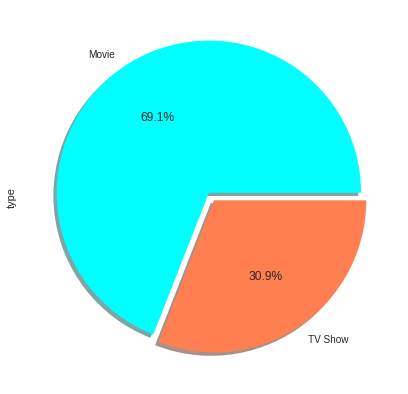

In [29]:
# Chart - 1 - value counts for each type
netflixVisualization.chart_1()

##### 1. Why did you pick the specific chart?

Pie chart expresses part to whole relationship with the data so I picked this chart to see percentage of TV shows and movies the in dataset.

##### 2. What is/are the insight(s) found from the chart?

I found that there are 69.1% movies and 30.9% TV Shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, percentage of movies are more the double of TV Shows. In movie industries competition is more than double.

#### Chart - 2 - Bar chart for country.

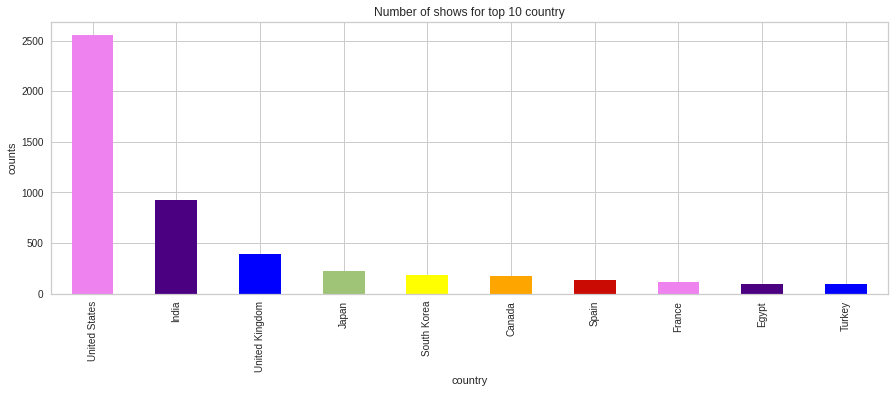

In [30]:
# Chart - 2 visualization code - Top 10 countries with highest number of shows
netflixVisualization.chart_2()

##### 1. Why did you pick the specific chart?

 A bar chart show value counts or frequency of the data for different columns and I picked this chart to see which are top 10 countries producing highest number of movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

I found that United State is producing highest number of movies that is more than 2500 movies then India is 2nd highest about 1000 after that United Kingdom producting about 500 movies/TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, most of the movies are producing in USA and India they can sell good movies in competitive price to netflix.

#### Chart - 3 - Bar chart for director.

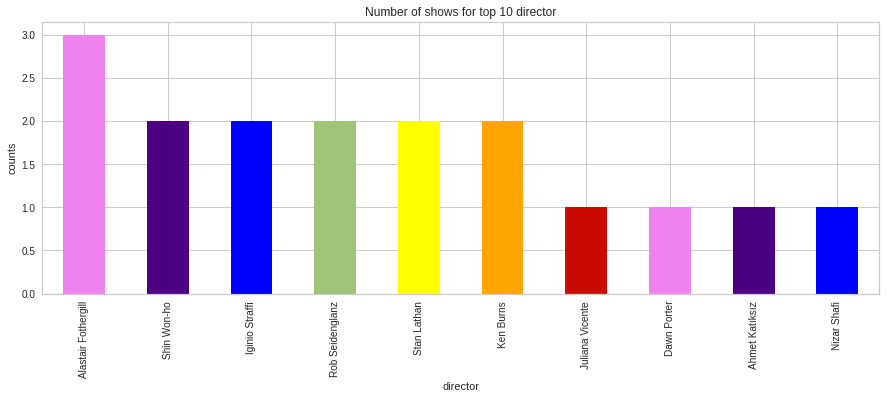

In [31]:
# Chart - 3 visualization code - TV  Shows - Top 10 directors with highest number of TV shows
netflixVisualization.chart_3('tv')

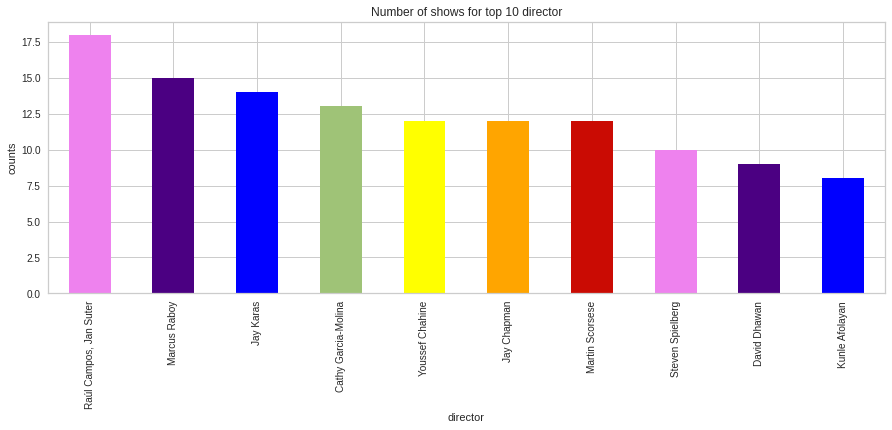

In [32]:
# Top 10 directors with highest number of Movies
netflixVisualization.chart_3('movie')

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top directors with highest number of TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1. Top 10 Directors for TV Shows.
  * Alastair Fothergill : 3 TV shows.
  * Ken Burns : 2 TV Shows.
  * Shin Won-ho : 2 TV Shows.
  * Iginio Straffi : 2 TV Shows.
  * Rob Seidenglanz : 2 TV Shows.
  * Stan Lathan : 2 TV Shows.
  * Rest of them produced only 1 TV show.
2. Top 10 Directors for Movies.
  * Raúl Campos and Jan Suter : 18 movies.
  * Marcus Raboy : 15 movies.
  * Jay Karas : 14 movies.
  * Cathy Garcia-Molina : 13 movies.
  * Youssef Chahine : 12 movies.
  * Jay Chapman : 12 Movies.
  * Martin Scorsese : 12 Movies.
  * Steven Spielberg : 10 Movies.
  * David Dhawan : 9 Movies.
  * Johnnie To : 8

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Maximum 3 TV Shows are produced by 1 director in other side maximum number of movies are 18 that is 6 times greater than TV shows. Movies are more in demand than TV shows becacuse most of the movies shows the ending part quickly and on other hand it takes much time to finish the TV shows completly.

#### Chart - 4 - Bar Chart Release Year.

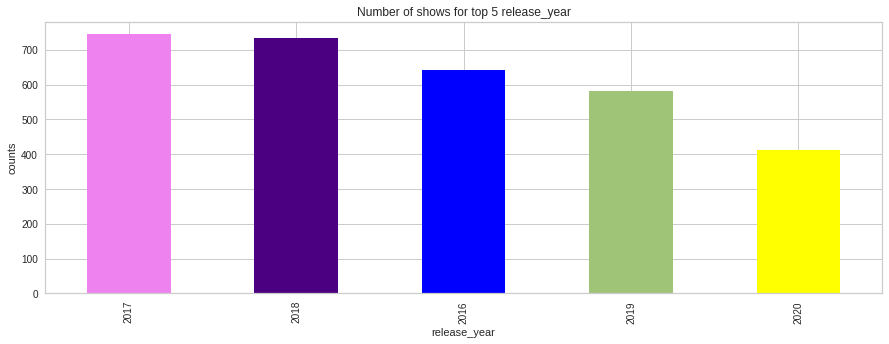

In [33]:
# Chart - 4 - Top 5 release year with highest number of Movies
netflixVisualization.chart_4('movie',top=5)

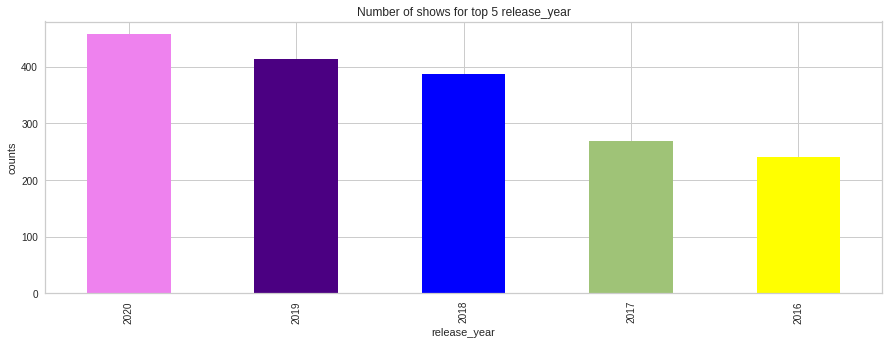

In [34]:
# Chart - 4 - Top 5 release year with highest number of TV shows
netflixVisualization.chart_4('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see nomber of shows for each year.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Movies released in each year:
  * 2017 : 744
  * 2018 : 734
  * 2016 : 642
  * 2019 : 582
  * 2020 : 411
2. Number of TV Shows released in each year:
  * 2020 : 457
  * 2019 : 414
  * 2018 : 387
  * 2017 : 268
  * 2016 : 240

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Highest number of movies released in the year 2017 and TV shows in 2020. The reason behind this is that TV shows are relatively small and movies takes much time when shooting. Since they shoots TV shows easily in advance therefore the number of TV Shows are higher in 2020 and movies are less because of corona virus. 

#### Chart - 5 - Bar Chart Rating.

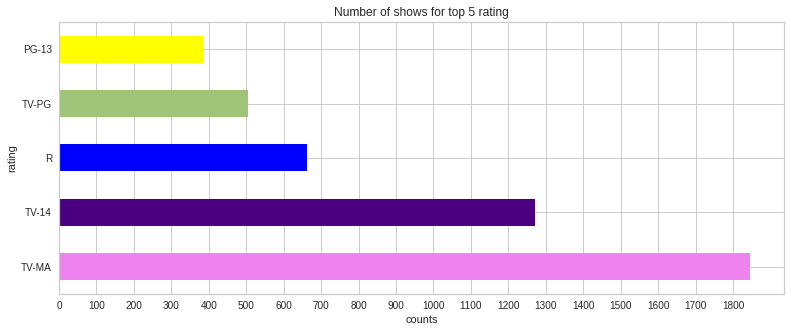

In [35]:
# Chart - 5 visualization code - Top 5 rating with highest number of Movies
netflixVisualization.chart_5('movie',top=5)

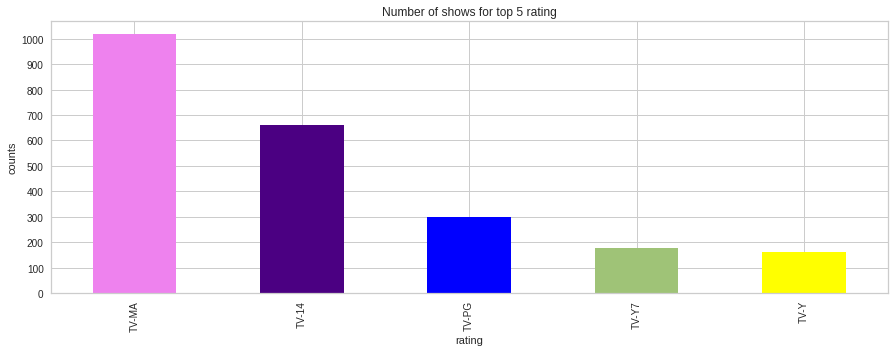

In [36]:
# Top 5 rating with highest number of TV Shows
netflixVisualization.chart_5('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of ratings.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Movies for top 5 ratings:
  * TV-MA : 1845
  * TV-14 : 1272
  * R : 663
  * TV-PG : 505
  * PG-13 : 386
2. Numbere of TV Shows for top 5 ratings:
  * TV-MA : 1018
  * TV-14 : 659
  * TV-PG : 301
  * TV-Y7 : 176
  * TV-Y : 163

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insight will help while making prediction.

#### Chart - 6 - Bar chart for Listed-in.

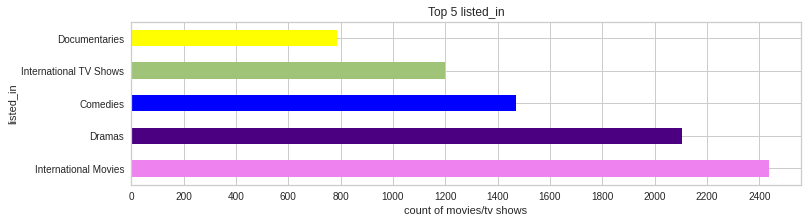

In [37]:
# Chart - 8 visualization code - Top 5 genres with highest number of shows
plt.xticks(np.arange(0,2601,200))
netflixVisualization.getTopBarh('listed_in')

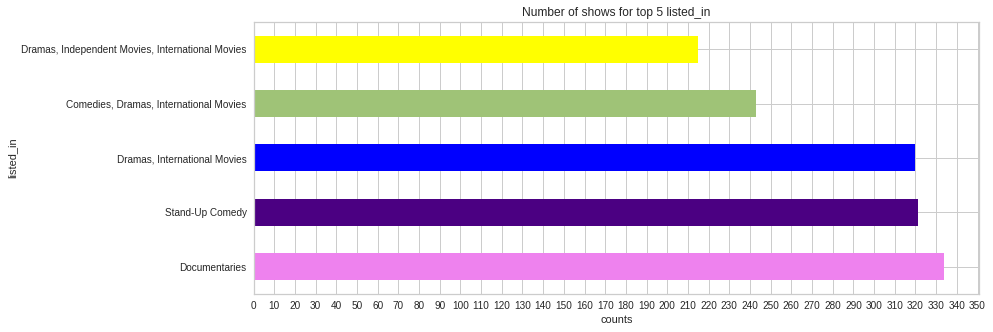

In [38]:
# Chart - 6 visualization code - Top 5 Listed_in with highest number of Movies
netflixVisualization.chart_6('movie',top=5)

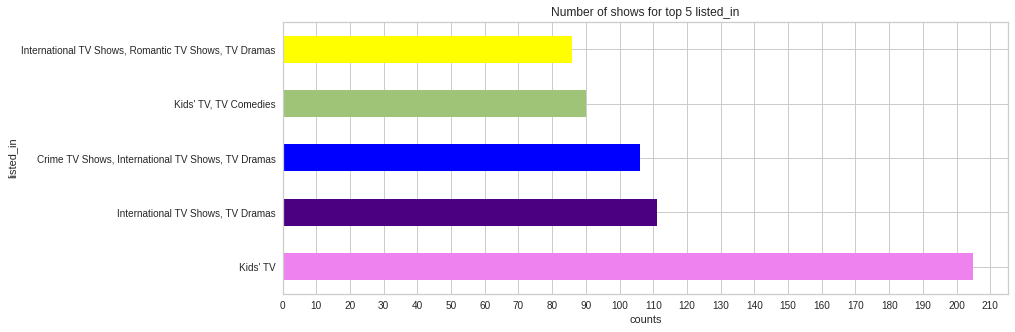

In [39]:
# Top 5 Listed_in with highest number of TV shows
netflixVisualization.chart_6('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of genres.

##### 2. What is/are the insight(s) found from the chart?

Top 10 genres with highest number of movies/tv shows.
* International Movies : 2437
* Dramas : 2106
* Comedies : 1471
* International TV Shows : 1199
* Documentaries : 786

1. Genres with highest number of movies :
 * Documentaries : 334
 * Stand-Up Comedy : 321
 * Dramas, International Movies : 320
 * Comedies, Dramas, International Movies : 243
 * Dramas, Independent Movies, International Movies : 215
2. Genres with highest number of TV Shows:
  * Kids' TV : 205
  * International TV Shows, TV Dramas : 111
  * Crime TV Shows, International TV Shows, TV Dramas : 106
  * Kids' TV, TV Comedies : 90
  * International TV Shows, Romantic TV Shows, TV Dramas : 86

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight will help while making the prediction.
1. Documentaries, Stand-up comedies, dramas, international movies, comedies and independent the genres which highest number of movies are being produced.
  Therefore these we can say that consumers mostly likes this kind of movies.
2. Kids TV, International TV shows, TV dramas, Crime tv shows, Romantic TV shows are the genres which are being produced in highest quantity.

#### Chart - 7 - Bar chart top 5 actors.

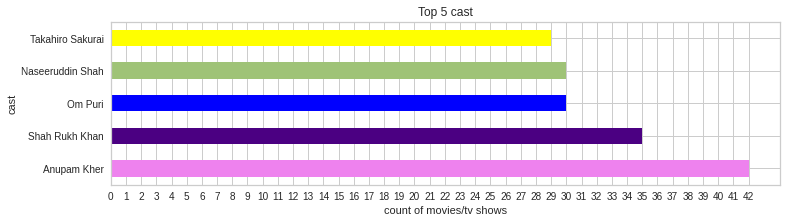

In [40]:
# Chart - 7 visualization code - Top 5 Actors with highest number of shows
plt.xticks(np.arange(0,43,1))
netflixVisualization.getTopBarh('cast')

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top 10 actors with highest number of movies/tv show.

##### 2. What is/are the insight(s) found from the chart?

I found that Anupam Kher worked in about 42 movies which is highest then Shahrukh Khan worked in about 37 movies that is 2nd highest, OM Puri, Nasisuddin Shah, Takahiro Sakurai, Akshay Kumar, Paresh Rawal, Yuki Kaji, Boman Irani and Amitabh Bachchan are from 3rd highest to 10 respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight will help while making the prediction.
These are the top actors consumers likes to watch them and their movies mostly break the records and earns high profits.

#### Chart - 9 - Bar chart monthly shows count.

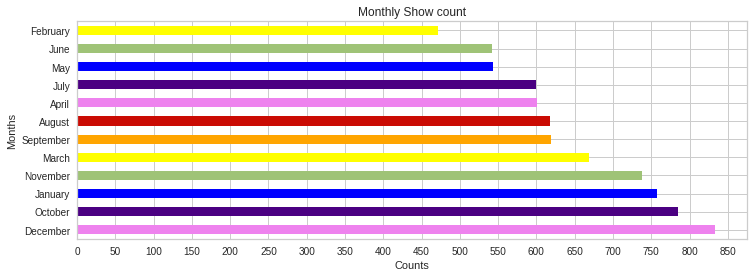

In [41]:
# Chart - 9 visualization code
netflixWrangling.getShowsPerMonth().plot.barh(figsize=(12,4),color=netflixVisualization.bar_colors)
plt.title('Monthly Show count')
plt.xlabel('Counts')
plt.ylabel('Months')
plt.xticks(np.arange(0,851,50))
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each column therefore I picked this chart to see counts of shows for each month.

##### 2. What is/are the insight(s) found from the chart?

I found that october, november, december and january have more than 700 highest number of movies are produced but every month there are more than 400 movies or TV Shows are being produced. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the movies are get produced during winter season.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
df_copy = netflix_df.copy()
df_copy['cast'] = df_copy['cast'].fillna('unknown cast')
df_copy['country'] = df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy = df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I replace nan with unknown cast and unknown country for columns cast and country. Then I dropped those rows which has less than or uqual to 10 nan values.

### 2. Handling Outliers

Before outlier treatment


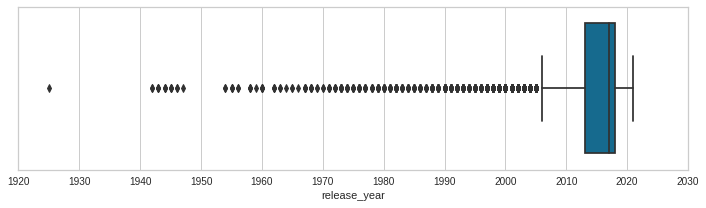

After iteration 1


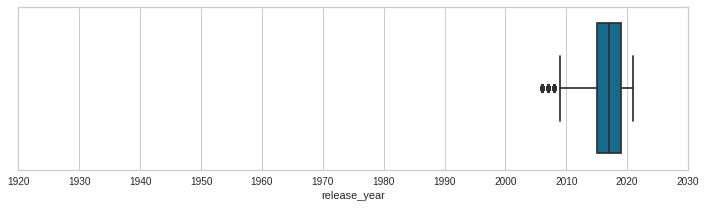

After iteration 2


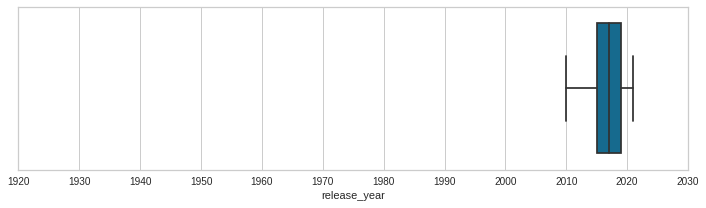

In [43]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def displayOutliers():
  ''' This function display outliers '''
  sns.boxplot(df_copy['release_year'])
  plt.xticks(np.arange(1920,2031,10))
  plt.show()

# Function for outlier treatment
def treatOutliers(df_copy):
  ''' Function takes dataset and returns a dataset after treating the outliers '''
  q1 = df_copy['release_year'].quantile(.25)
  q3 = df_copy['release_year'].quantile(.75)
  iqr = q3-q1
  lower = q1-1.5*(iqr)
  df_copy = df_copy[df_copy['release_year'] > lower]
  return df_copy

# Treating the outlier by applying the above function
print('Before outlier treatment')
displayOutliers()
for i in range(2):
    print('After iteration '+str(i+1))
    df_copy=treatOutliers(df_copy)
    displayOutliers()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used q1-1.5iqr technique to remove uni-variate outliers because the column release_year had outliers.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns - One hot encoding for the column type
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x=='Movie' else 1)
df_copy.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is not biased to a particular variable therefore I did one hot encoding of column type and created new columns movie and tv_show.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [45]:
# Combining the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 1. Expand Contraction - Not done.

In [46]:
# Expand Contraction

#### 2. Lower Casing

In [47]:
# Lower Casing
# Function to convert in lower case
def lower_casing(text):
  ''' function takes string and conver it to lower case '''
  list_of_words = [letter.lower() for letter in text.split()]
  return ' '.join(list_of_words)
  
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [48]:
# Function to remove punctuations
def rem_punctuation(text):
  '''
  takes text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])
  
# Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Function to remove URLs and digits
def removeDigits(text):
  '''
  takes text and removes digits
  '''
  nums = ['0','1','2','3','4','5','6','7','8','9']
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeDigits)

# Function to remove url
def removeUrls(text):
  '''
  Takes a texts and removes url
  '''
  return ' '.join([t for t in text.split('.') if t not in ['com','www','https//']])

# Remove URLs & Remove words and digits contain digits
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeUrls)

#### 5. Removing Stopwords & Removing White spaces

In [50]:
nltk.download('stopwords')
# Function to remove stop words
def removeStopWords(text):
  '''
  Takes text and removes stop words
  '''
  stopwords_ = nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords_])

# Remove Stopwords
print('Length before removing stopwords ',len(df_copy['cluster_col'][0]))
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeStopWords)
print('Length after removing stopwords ',len(df_copy['cluster_col'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Length before removing stopwords  361
Length after removing stopwords  317


In [51]:
# Function to remove white spaces
def removeWhiteSpace(text):
  '''
  takes text and removes white spaces
  '''
  return ' '.join([t for t in text.split(' ')])
# Remove White spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeWhiteSpace)

#### 7. Tokenization

In [52]:
# Vectorization Function
def getVectorized(df):
  ''' Function takes dataset and apply vectorization '''
  count_vectorizer = CountVectorizer()
  # Fitting the count vectorizer
  count_vectorizer.fit_transform(df['cluster_col'])
  # Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()

# Applying the  above function and showing the features
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

dict_items([('joão', 17961), ('miguel', 23124), ('bianca', 4066), ('comparato', 7333), ('michel', 23063), ('gomes', 13872), ('rodolfo', 30187), ('valente', 37584), ('vaneza', 37655), ('oliveira', 25734), ('rafael', 28665), ('lozano', 21047), ('viviane', 38188), ('porto', 27761), ('mel', 22763), ('fronckowiak', 12834), ('sergio', 32002), ('mamberti', 21690), ('zezé', 39945), ('motta', 23889), ('celso', 6124), ('frateschi', 12726), ('international', 16885), ('tv', 36951), ('shows', 32686), ('dramas', 9993), ('sci', 31609), ('fi', 12157), ('fantasy', 11830), ('future', 12982), ('elite', 10706), ('inhabit', 16748), ('island', 17092), ('paradise', 26496), ('far', 11834), ('crowded', 8062), ('slums', 33229), ('get', 13488), ('one', 25806), ('chance', 6279), ('join', 17826), ('saved', 31374), ('squalor', 33865), ('demián', 8922), ('bichir', 4080), ('héctor', 16238), ('bonilla', 4587), ('oscar', 26006), ('serrano', 32022), ('azalia', 2835), ('ortiz', 25994), ('octavio', 25520), ('carmen', 5847

In [53]:
# Total features
print('Total Features ',len(dictionary_cluster_col))

Total Features  40255


#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Stemming finction
def stemming(text):
  ''' Takes text and returns after stemming. '''
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

# Function to assign words and counts from dictionary to list
def assignWordsAndCountsToList(dictionary):
  ''' Takes dictionary and return list of words and counts. '''
  vocab_cluster = [ ]
  vocab_counts_cluster = []
  for key , value in dictionary:
    vocab_cluster.append( key )
    vocab_counts_cluster.append( value )
  return vocab_cluster,vocab_counts_cluster

# Function to display word count
def displayTop20Words(df):
  '''  Displays top 20 words. '''
  plt.barh(df.head(20)['word'].values,df.head(20)['count'].values)
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.show()

##### Before Stemming

In [55]:
# Assigning words and counts to lists
vocab_cluster,vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

22875     38911     36955  33549  18653   18651  26998  25290  20729  \
word    ṣọpẹ  żurawski  żulewska    źak  şükrü  şükran   şçil   ştar   şler   
count  40254     40253     40252  40251  40250   40249  40248  40247  40246   

       34429   16369   16404  38609     23850    19872   21973   22422  22025  \
word   şiten  şinasi  şimşek  şeref  şenolsun  şenocak  şenhuy  şendil  şenay   
count  40245   40244   40243  40242     40241    40240   40239   40238  40237   

       27576   27250  
word     şen  şebnem  
count  40236   40235

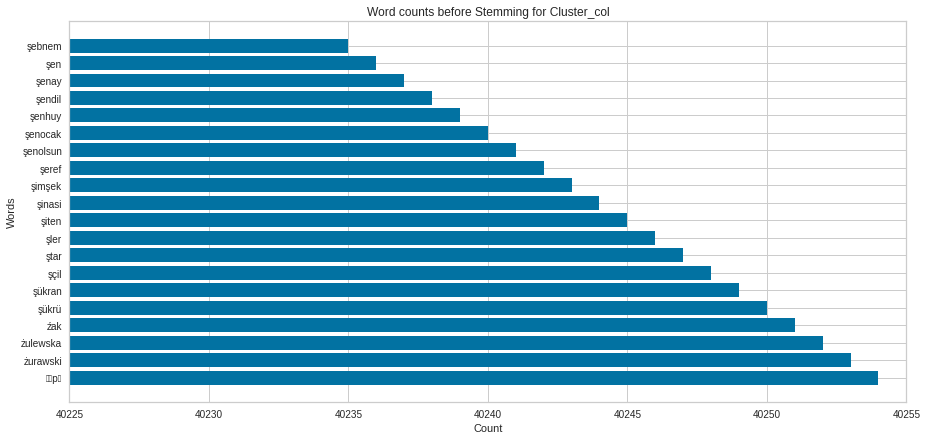

In [56]:
# Plotting top 10 words
plt.rcParams['figure.figsize'] = (15,7)
plt.xlim(40225,40255)
plt.title('Word counts before Stemming for Cluster_col')
displayTop20Words(df_cluster_before_stem)

###### Which text normalization technique have you used and why?

Stemming removes the extra tail of the words like coming converted to come. I am using this technique to remove the tail of the words.

##### After Stemming

In [57]:
# Stemming and assigning words to a variable
df_copy['cluster_col'] = df_copy['cluster_col'].apply(stemming)
dictionary_cluster_col = getVectorized(df_copy)
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster , vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts after stemming
df_cluster_after_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_after_stem.head(20).T

21089     35984     34145  30960  17217   17215  24865  23307  19104  \
word    ṣọpẹ  żurawski  żulewska    źak  şükrü  şükran   şçil   ştar   şler   
count  37258     37257     37256  37255  37254   37253  37252  37251  37250   

       31776   15117   15153  35700     21984    18315   20269   20673  20314  \
word   şiten  şinasi  şimşek  şeref  şenolsun  şenocak  şenhuy  şendil  şenay   
count  37249   37248   37247  37246     37245    37244   37243   37242  37241   

       25416   25104  
word     şen  şebnem  
count  37240   37239

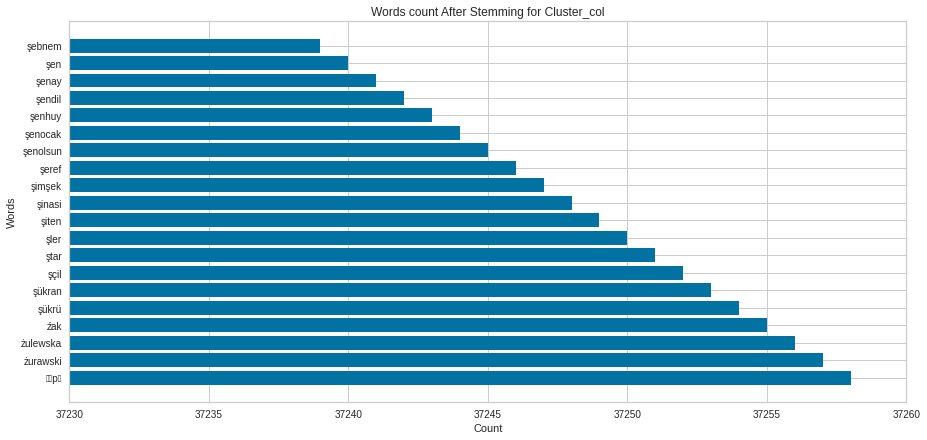

In [58]:
# Plotting top 10 words
plt.xlim(37230,37260)
plt.title('Words count After Stemming for Cluster_col')
displayTop20Words(df_cluster_after_stem)

#### 10. Text Vectorization

In [59]:
# Function to get number from proportion
def proportionToNumber(proportion,data):
  return (proportion * data)/100

num = int(round(proportionToNumber(1,len(df_copy)),0))
# Vectorizing Text - discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer = TfidfVectorizer(min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names()
df_copy.shape

(6596, 13)

In [60]:
# Making dataframe with vocabularies
X = pd.DataFrame(features_array,columns=features_names)
X.shape

(6596, 396)

##### Which text vectorization technique have you used and why?

I used tfidfVectorization technique.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are a huge number of features and most of them are containing zeros therefore we need to do dimentionality reduction.

In [61]:
# Dimensionality Reduction (If needed)
pca = PCA(n_components=.975)
pca.fit(X.values)
X2 = pca.transform(X.values)
len(X2[0])

364

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis.

## ***7. ML Model Implementation***

### ML Model - 1 - KMeans

In [62]:
# Function to display clusters
def displayClusters(X,labels,centers):
  ''' Takes data, labels and centers and plots the scatter chart '''
  plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
  plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
  plt.show()

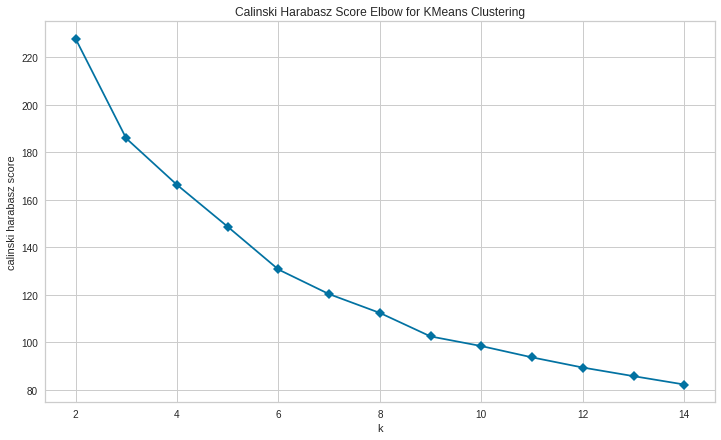

In [63]:
# ML Model - 1 Implementation - KElbowVisualization
plt.rcParams['figure.figsize'] = (12,7)
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model,k=(2,15),metric='calinski_harabasz',timings=False,locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X2)
# Predict on the model
visualizer.show()
plt.show()

for cluster  2  the silhouette score is  0.02737022003911705


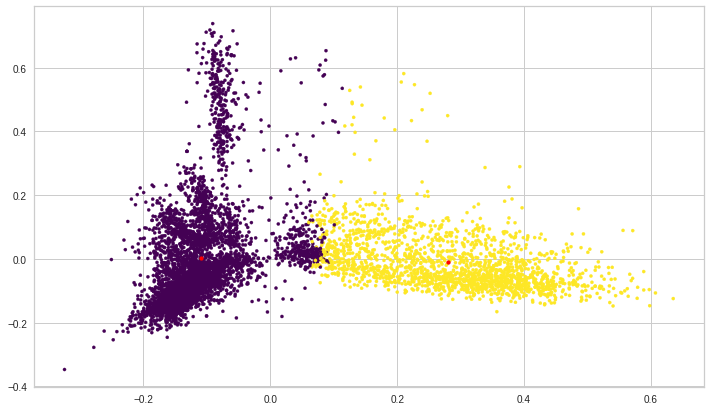

for cluster  3  the silhouette score is  0.03570362546519892


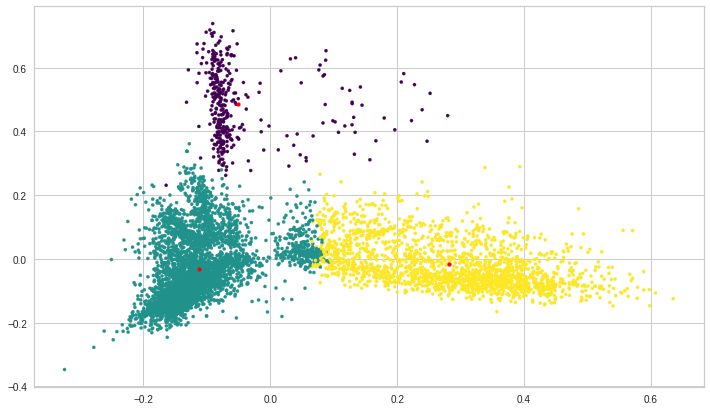

for cluster  4  the silhouette score is  0.0408806101947556


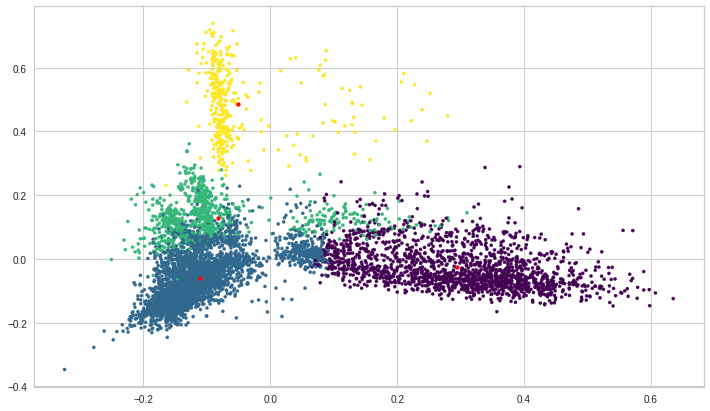

for cluster  5  the silhouette score is  0.04520811278037867


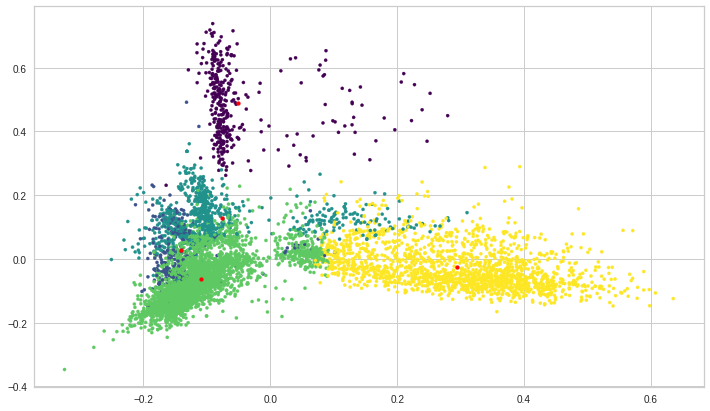

for cluster  6  the silhouette score is  0.04650114204823984


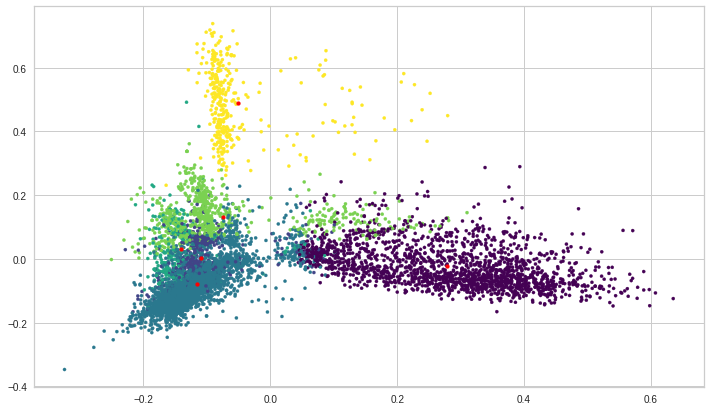

for cluster  7  the silhouette score is  0.042880886708823965


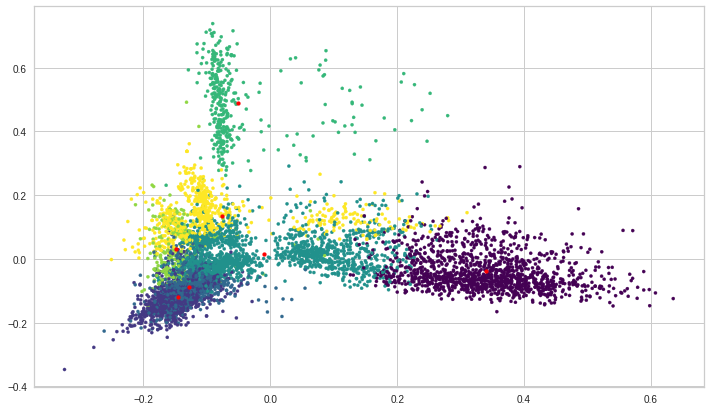

for cluster  8  the silhouette score is  0.04331043017427398


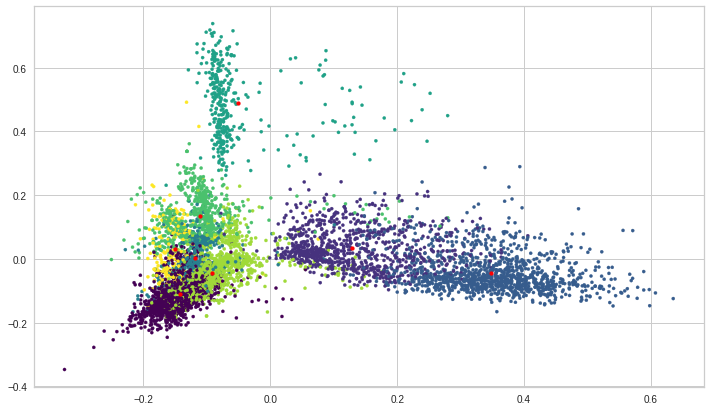

for cluster  9  the silhouette score is  0.04329371742520869


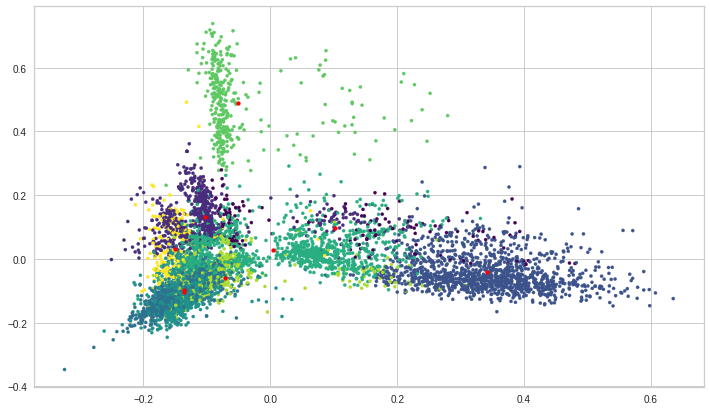

for cluster  10  the silhouette score is  0.04465878156704652


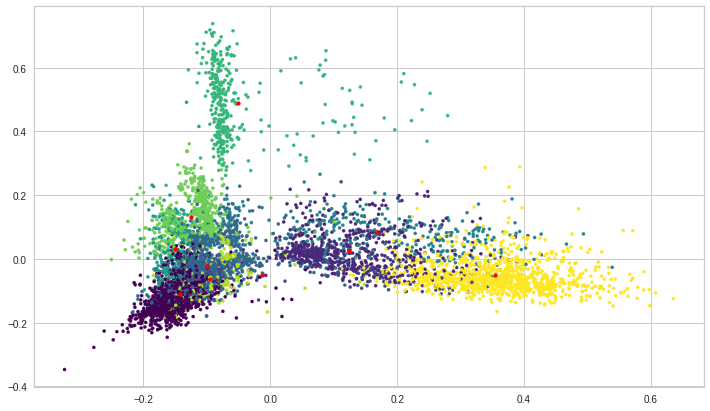

for cluster  11  the silhouette score is  0.038124228540023154


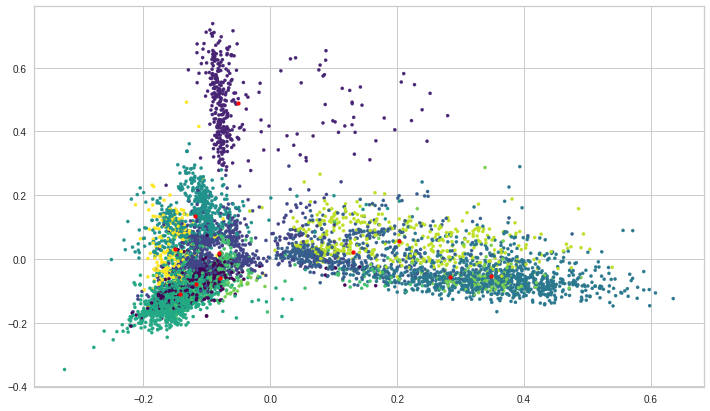

for cluster  12  the silhouette score is  0.038081890094457886


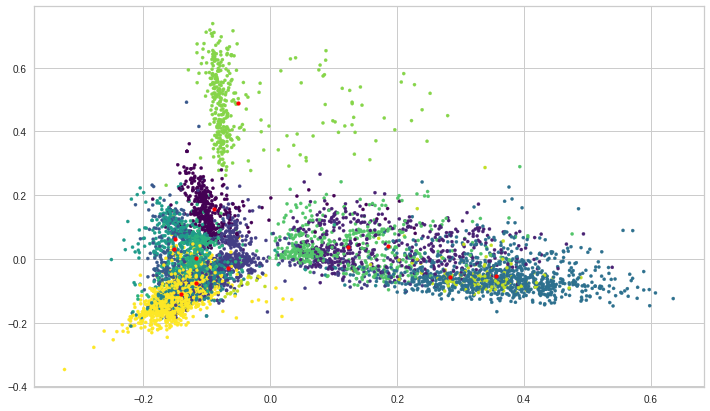

for cluster  13  the silhouette score is  0.038814723387649595


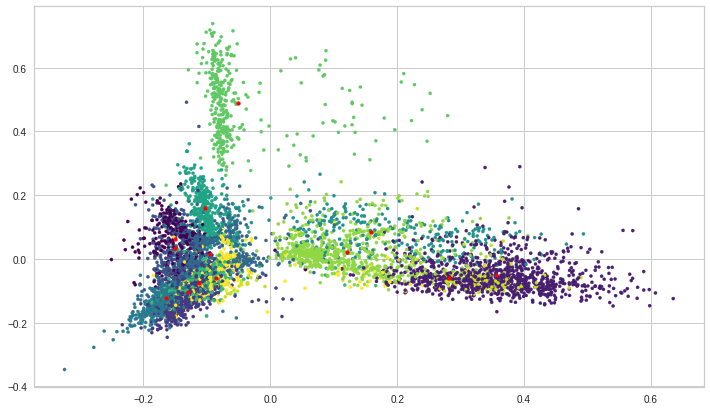

for cluster  14  the silhouette score is  0.04171126781539173


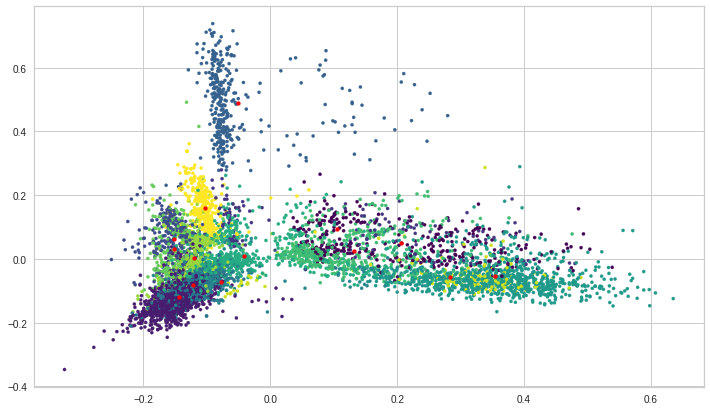

In [64]:
# Silhouette Score for each cluster
n_clusters_range = np.arange(2,15)
for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c,random_state=10)
    pred = clusterer.fit_predict(X2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X2,pred)
    inertia = clusterer.inertia_
    print('for cluster ',c,' the silhouette score is ',score)
# plotting the results:
    displayClusters(X2,pred,centers)

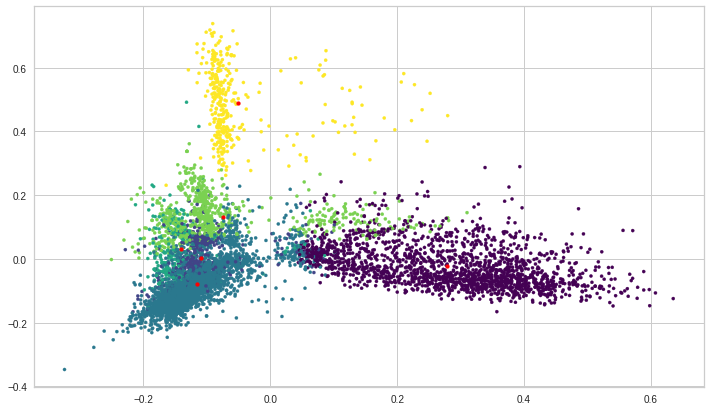

In [65]:
# Silhouette score is good at 6 clusters therefore I am taking n_clusters = 6.
kmeans= KMeans(n_clusters=6, random_state=10,max_iter=100)
kmeans.fit(X2)

# predict the labels of clusters.
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_
# plotting the results:
displayClusters(X2,labels,centers)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From KElbow visualization I found that after n_cluster = 6 the slop is very close to constant and silhouette score is also high that is .046

#### 2. Cross- Validation & Hyperparameter Tuning - Cross validation is not required in clustering algorithm.

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
mdl = KMeans()
params ={'n_clusters':[6],'random_state':[10],'max_iter':[15,20],'tol':[.01,.1]}
kmeans_gridcv = GridSearchCV(mdl,param_grid=params,verbose=2,cv=2)
# Fit the Algorithm
kmeans_gridcv.fit(X2)
# Predict on the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(X2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   1.7s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   1.7s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   1.6s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   1.6s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   1.8s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   1.9s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   1.7s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   1.7s


In [67]:
kmeans_gridcv.best_params_

{'max_iter': 20, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}

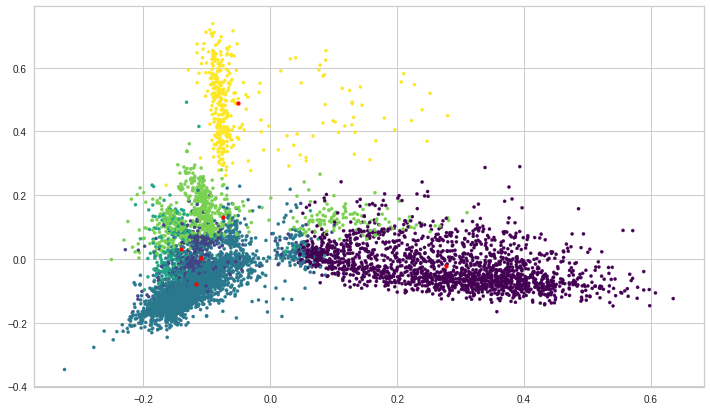

In [68]:
# plotting the results:
centers = best_kmeans.cluster_centers_
plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

1. I think cross validation is not needed for clustering.
I used n_clusters and max_iter hyper parameters to tune the parameters and I did not found any improvement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did not see any improvement.

### ML Model - 2 - Agglomerative Clustering

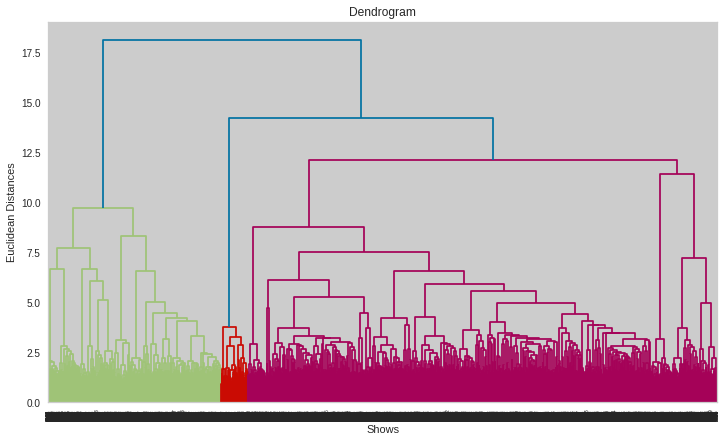

In [69]:
# Using the dendogram to find the optimal number of clusters - and find largest vertical distance we can make without crossing any other horizontal line
linkage =sch.linkage(X2, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show() 

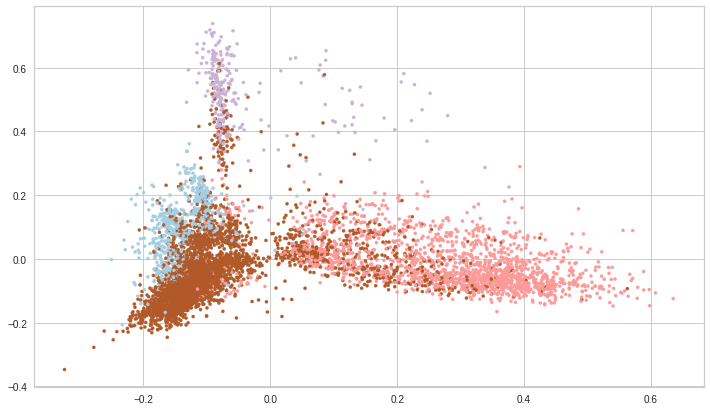

In [70]:
# Fitting hierarchical clustering to the mall dataset
# Average and single linkage is not good
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)
# Plotting the results:
plt.scatter(X2[: , 0] , X2[: , 1] , c=y_hc,s=10,cmap='Paired')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Since there are lot of noice in the dataset therefore the result is not good but for n_clusters = 4 it seems better.

#### 2. Cross- Validation & Hyperparameter Tuning - Not required.

### ML Model - 3 - DBSCAN

In [71]:
# ML Model - 3 Implementation
dbscan = DBSCAN(eps=.91,min_samples=15,algorithm='auto')
# Fit the Algorithm
dbscan.fit(X2)
# Predict on the model
ypred = dbscan.fit_predict(X2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

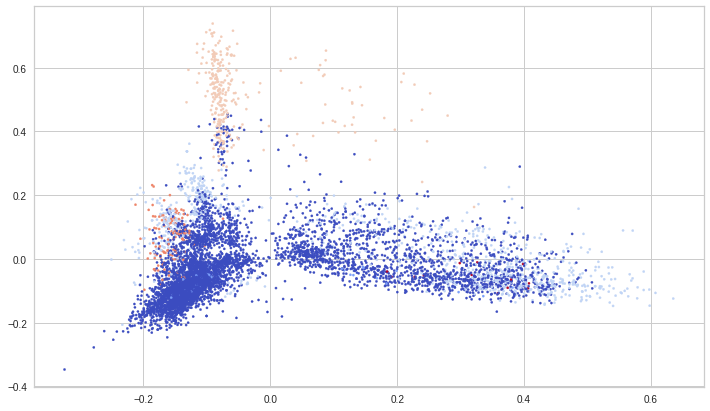

In [72]:
# Visualizing evaluation Metric Score chart
plt.scatter(X2[:,0], X2[:,1], c=ypred,s=5,cmap='coolwarm')
plt.show()

Dbscan is not good if there are lot of noise in the dataset. Here we can see this algorithm is giving a big cluser and 3 to 4 very small clusters.

#### 2. Cross- Validation & Hyperparameter Tuning - Not required.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Euclidean distance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose Kmeans because the model is fast and giving better result than all the others.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. The dataset  has 7787 rows and 12 columns.
2. There are 30.68% null values in director, 9.22% in cast column, 6.51% in country, 0.13 in date_added, and 0.09 on rating columns.
3. The dataset containing only movies has shape (5377,14) and for TV Shows has (2410,14).
4. Total number of features after vectorization is 40255.
5. Total features after dimentionality reduction is 364.
6. Kmeans clustering is giving good clusters therefore I would choose Kmeans with n_clusters = 6 because silhouette in this case is very good .046
7. Agglomerative clustering is also good but for high number of clusters it is not giving better cluster.
8. DBSCAN is giving a large size of cluster because my data is very noisy therefore in this case dbscan is not good.
9. Below given excel report card:

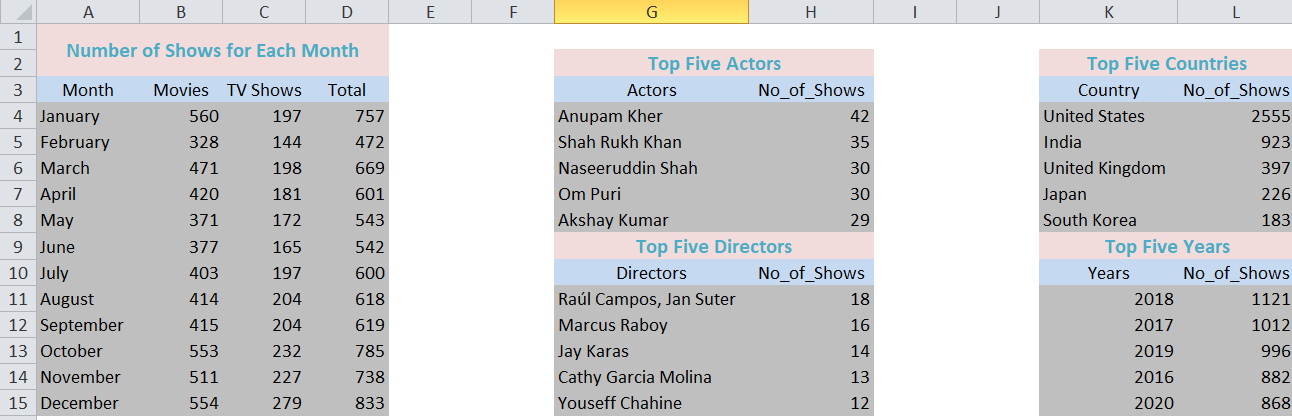

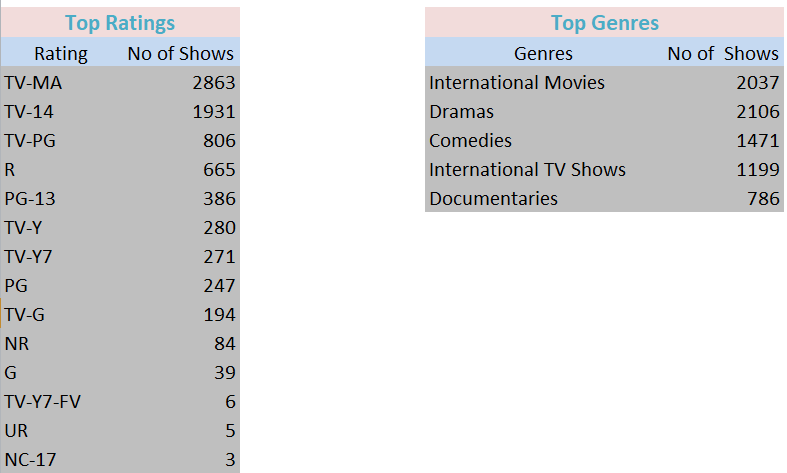

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***